Best :  0.05973262822372562


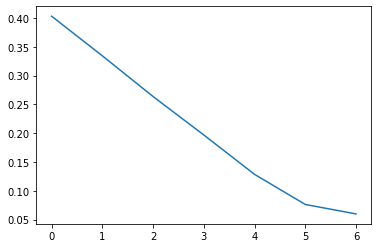

In [238]:
import random as rand
import numpy as np
import heapq
import matplotlib.pyplot as plt
import copy

# Problem Configuration:
    # A k x n 0-1 matrix
n = 4; # dimension 
k = 10; # number of points to sample
x = np.array([rand.random() for i in range(n)]) # point of interest
# SIMPLE local search; finds local minimum
# A transition consists of moving a single vertex by an edge


# cost function for the problem 
# Cost of state w.r.t x
def cost(state, x):
    return np.sqrt(np.sum((x - np.sum(state, axis = 0)/k)**2));
        
# nk successors to a given state
# returns a set
def getSuccessors(state):
    successors = [];
    for i in range(k):
        for j in range(n):
            succ = copy.deepcopy(state); 
            succ[i][j] = 1 if state[i][j]==0 else 0;
            successors.append(succ);
    return successors;
    

# Search is of size nk each time
def hillclimbing():
    trialFit = [];
    # Sample an initial state (uniformly now but could be improved)
    current = np.array([[rand.randint(0,1) for j in range(n)] for i in range(k)]);
    # begin the descent!
    while(True):
        # find the minimum cost neighbor
        neighbor = min(getSuccessors(current), key = lambda state: cost(state, x));
        
        # end if we reach a local min
        neighbor_cost = cost(neighbor,x);
        if (neighbor_cost >= cost(current, x)):
            return current, cost(current, x), trialFit;
    
        trialFit.append(neighbor_cost);
        current = neighbor;

# Search is of size n*k*beta each time
# This is buggy right now!
def beamSearch(beta, numsteps):
    trialFit = [];
    # Sample set of beta initial states (uniformly)
    current = [np.array([[rand.randint(0,1) for j in range(n)] for i in range(k)]) for l in range(beta)];
    print(current)
    # begin descent!
    for i in range(numsteps):
        # Get successors of all beta current states
        allSuccessors_unflattened = [getSuccessors(state) for state in current];
        # flatten the list and remove duplicates (removing duplicates seems annoying...better to just not)
        allSuccessors = [state for states in allSuccessors_unflattened for state in states]; 
        
        # remove duplicates
#         allUniqueSuccessors = [];
#         for state1 in allSuccessors:
#             flag = False;
#             for state2 in allUniqueSuccessors:
#                 # state is already in there
#                 if np.array_equal(state1, state2):
#                     flag = True;
#                     break
#             if flag == False:
#                 allUniqueSuccessors.append(state1);
#         print(len(allUniqueSuccessors));
#         print(len(allSuccessors));

        # get the beta smallest neighbors
        min_neighbors = heapq.nsmallest(beta, allSuccessors, key = lambda state: cost(state, x));
        print(min_neighbors);
        # add the costs to the fit plot...also super slightly inefficient
        trialFit.append([cost(state, x) for state in min_neighbors]);
        current = min_neighbors;
        
    # get final best state
    best_state = min(current, key = lambda state: cost(state, x));
    best_fit = cost(best_state, x);
    return best_state, best_fit, trialFit;
    

state, finalCost, fit = hillclimbing();
print("Best : ", finalCost)
# plot the figure
plt.figure();
plt.plot(fit)
plt.show();